In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("england_metrics.csv")
print(df.columns)
df = df.drop(['areaCode', 'areaName', 'areaType'], axis=1)
df.head()

Index(['areaCode', 'areaName', 'areaType', 'date',
       'cumPeopleVaccinatedFirstDoseByVaccinationDate',
       'cumPeopleVaccinatedSecondDoseByVaccinationDate',
       'cumVaccinationThirdInjectionUptakeByVaccinationDatePercentage',
       'newCasesBySpecimenDate', 'newAdmissions', 'covidOccupiedMVBeds',
       'newDeaths28DaysByDeathDate', 'newVirusTestsBySpecimenDate',
       'newFirstEpisodesBySpecimenDate', 'newReinfectionsBySpecimenDate',
       'newCasesBySpecimenDate.1', 'true_positive_rate'],
      dtype='object')


,date,cumPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,cumVaccinationThirdInjectionUptakeByVaccinationDatePercentage,newCasesBySpecimenDate,newAdmissions,covidOccupiedMVBeds,newDeaths28DaysByDeathDate,newVirusTestsBySpecimenDate,newFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,newCasesBySpecimenDate.1,true_positive_rate
0,14/11/2022,44000727,41990007,59.9,3218,522,130,20,33397,2032,1186.0,3218,0.096356
1,13/11/2022,44000090,41989328,59.9,2562,445,139,39,23222,1632,930.0,2562,0.110326
2,12/11/2022,43999700,41988683,59.8,2099,370,139,37,23743,1422,677.0,2099,0.088405
3,11/11/2022,43998333,41986499,59.8,2477,435,137,75,29759,1667,810.0,2477,0.083235
4,10/11/2022,43997554,41985522,59.8,2744,550,149,59,36494,1835,909.0,2744,0.075190


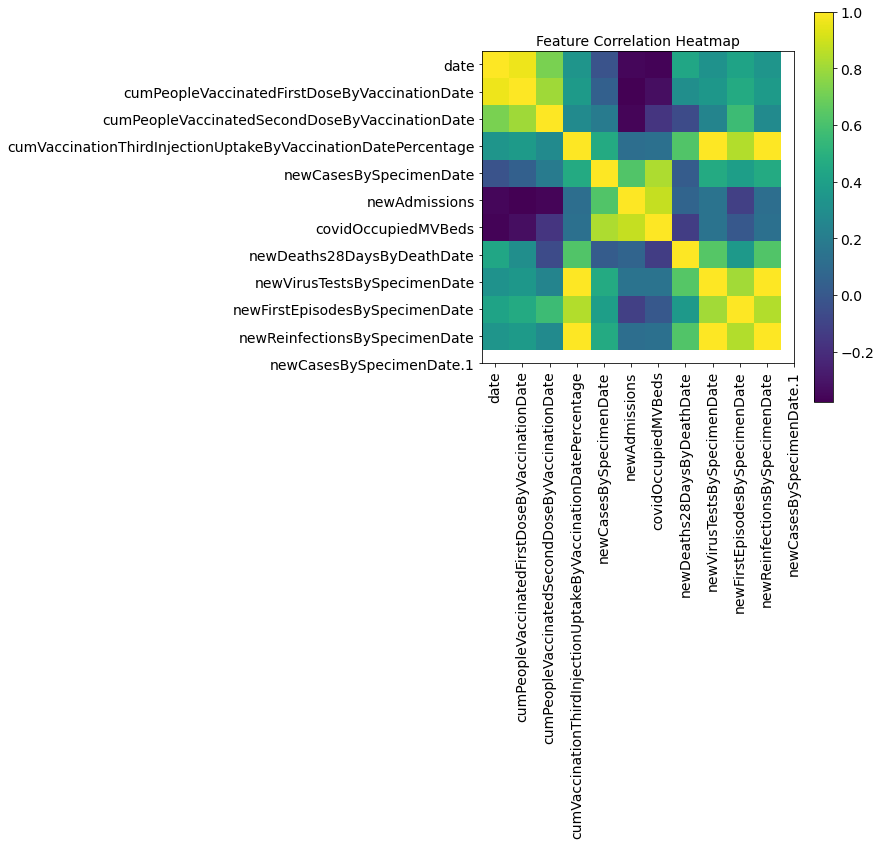

In [42]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()

show_heatmap(df)

In [43]:
def norm(data):
    data2 = []
    for ind in reversed(data.index):
        data2.append(data.loc[ind])
    data = pd.Series(data2)
    return (data-np.mean(data))/np.std(data)

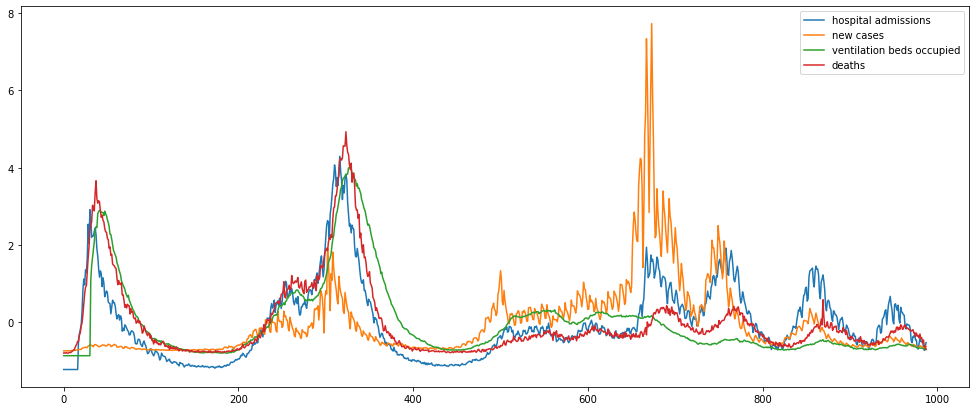

In [59]:
plt.rcParams["figure.figsize"] = (17,7)
sns.lineplot(data=norm(df["newAdmissions"]), label = "hospital admissions")
sns.lineplot(data=norm(df["newCasesBySpecimenDate"]), label ="new cases")
sns.lineplot(data=norm(df["covidOccupiedMVBeds"]), label = "ventilation beds occupied")
sns.lineplot(data=norm(df["newDeaths28DaysByDeathDate"]), label = "deaths")
plt.show()

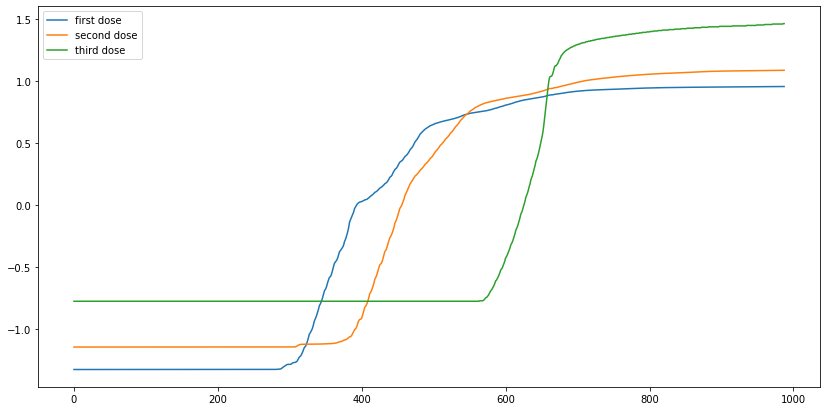

In [47]:
plt.rcParams["figure.figsize"] = (14,7)
sns.lineplot(data=norm(df["cumPeopleVaccinatedFirstDoseByVaccinationDate"]), label = "first dose")
sns.lineplot(data=norm(df["cumPeopleVaccinatedSecondDoseByVaccinationDate"]), label = "second dose")
sns.lineplot(data=norm(df["cumVaccinationThirdInjectionUptakeByVaccinationDatePercentage"]), label = "third dose")
plt.show()

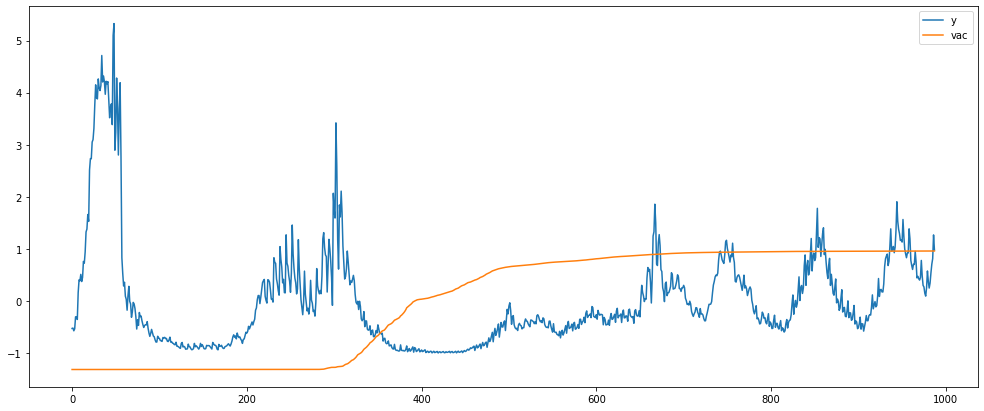

In [58]:
sns.lineplot(data=norm(df.true_positive_rate), label = "y")
sns.lineplot(data=norm(df["cumPeopleVaccinatedFirstDoseByVaccinationDate"]), label ="vac")
plt.show()